In [1]:
import os
import pickle
import random

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

from torch.utils.data import DataLoader

from kumaraswamy import Kumaraswamy
from hard_kumaraswamy import StretchedAndRectifiedDistribution as HardKumaraswamy

In [82]:
# a = torch.rand(3,2)
# b = torch.rand(3,2)

a = torch.rand(1)
b = torch.rand(1)

print(a)
print(b)

# kuma_prior = Kumaraswamy(torch.zeros_like(a), torch.zeros_like(b))
kuma_prior = Kumaraswamy(a, b)
kuma_post  = Kumaraswamy(a, b)

print(kuma_prior.sample())
# print(kuma_post.sample())

print(kuma_prior.log_prob(kuma_prior.sample()))


kl_div = torch.distributions.kl.kl_divergence(kuma_post, kuma_prior)
print('KL Divergence: {}'.format(torch.sum(kl_div)))
print(kl_div)

tensor([0.6993])
tensor([0.2918])
tensor([0.0444])
tensor([1.4737])
KL Divergence: -0.1487128734588623
tensor([-0.1487])


In [84]:
loc = torch.rand(1)
var = torch.rand(1)

norm_a = torch.distributions.normal.Normal(loc, var)
norm_b = torch.distributions.normal.Normal(loc, var)

kl_div = torch.distributions.kl.kl_divergence(norm_a, norm_b)

print(kl_div)
print(norm_a.log_prob(norm_a.sample()))


tensor([0.])
tensor([-1.8417])


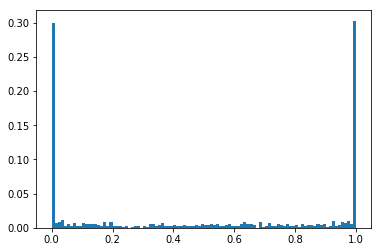

In [67]:
a = torch.tensor([.139])
b = torch.tensor([.286])

kuma = Kumaraswamy(a, b)

m = HardKumaraswamy(kuma)
samples = [m.sample() for _ in range(1000)]

n, bins, _ = plt.hist(samples, density=False, bins=100, weights=np.ones(len(samples)) / len(samples))

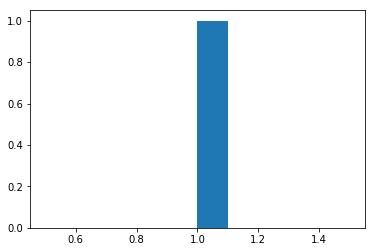

In [69]:
a = torch.tensor([.0])
b = torch.tensor([.0])

kuma = Kumaraswamy(a, b)

m = HardKumaraswamy(kuma)
samples = [m.sample() for _ in range(1000)]

n, bins, _ = plt.hist(samples, density=False, bins=10, weights=np.ones(len(samples)) / len(samples))